MAESTRÍA EN CIENCIA DE DATOS V4
MATERIA: MINERÍA DE DATOS I
PROYECTO DE MATERIA

El proyecto consiste en la aplicación de las siguientes técnicas:

Naive Bayes
Association Rules
Linear Regression
Logistic Regresion

Lineamientos:

•	Este proyecto se realiza por grupo
•	Se deben presentar cuatro Jupyter Notebooks.
•	Cada notebook debe contar con el proceso EDA correspondiente.
•	Los datasets pueden ser de las instituciones donde trabajan los maestrantes con la debida codificación por cuestiones de pertenencia del dataset, a no ser que sean datos públicos. Como también de otras fuentes como Kaggle.com u otras.


VARIABLES (PREDICTORES)

    * OAR   (Outline Aspect Ratio)--------->Relación de aspecto del contorno de la cara
    * LBAR  (Left eyeBrow Aspect Ratio)---->Relación de aspecto de la ceja izquierda
    * RBAR  (Right eyeBrow Aspect Ratio)--->Relación de aspecto de la ceja derecha
    * NUAR  (Nose Up Aspect Ratio)--------->Relación de aspecto de la parte superior de la nariz
    * NDAR  (Nose Down Aspect Ratio)------->Relación de aspecto de la parte baja de la nariz
    * LEAR  (Left Eye Aspect Ratio)-------->Relación de aspecto del ojo izquierdo
    * REAR  (Right Eye Aspect Ratio)------->Relación de aspecto del ojo derecho
    * OLAR  (Out Lips Aspect Ratio)-------->Relación de aspecto del contorno externo de los labios
    * ILAR  (In Lips Aspect Ratio)--------->Relación de aspecto del contorno interno de los labios

In [136]:
#Logistic Regresion
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [62]:
df_neutral = pd.read_csv('neutral.csv')
df_sorpresa = pd.read_csv('sorpresa.csv')
#union de los dos dataframes
df = pd.concat([df_neutral, df_sorpresa], ignore_index=True)
#shuffle de df
df = df.sample(frac=1).reset_index(drop=True)

In [63]:
sys.setrecursionlimit(10000)
print(df.describe().loc[['min','max']],"\n",df.head(5),"\n","\n",sep='\n')

        OAR    LBAR    RBAR    NUAR    NDAR    LEAR    REAR    OLAR    ILAR  \
min  0.1237  0.3225  0.3066  1.2984  1.7179  0.0640  0.0557  0.1237  0.0000   
max  0.1513  0.6777  0.7053  1.7878  2.0592  0.4041  0.4213  0.1513  0.4613   

     TAG  
min  0.0  
max  1.0  


      OAR    LBAR    RBAR    NUAR    NDAR    LEAR    REAR    OLAR    ILAR  TAG
0  0.1283  0.4296  0.4442  1.4856  1.8602  0.2442  0.2707  0.1283  0.0208    0
1  0.1270  0.4263  0.4352  1.4774  1.8597  0.2692  0.2780  0.1270  0.0154    0
2  0.1432  0.6193  0.6014  1.6440  1.8352  0.2631  0.2972  0.1432  0.3204    1
3  0.1437  0.5609  0.5496  1.5787  1.8719  0.2802  0.3109  0.1437  0.3053    1
4  0.1254  0.4223  0.4399  1.4945  1.8515  0.2770  0.2712  0.1254  0.0218    0






In [64]:
print(df.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22135 entries, 0 to 22134
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OAR     22135 non-null  float64
 1   LBAR    22135 non-null  float64
 2   RBAR    22135 non-null  float64
 3   NUAR    22135 non-null  float64
 4   NDAR    22135 non-null  float64
 5   LEAR    22135 non-null  float64
 6   REAR    22135 non-null  float64
 7   OLAR    22135 non-null  float64
 8   ILAR    22135 non-null  float64
 9   TAG     22135 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB
None


In [65]:
x1 = len(df)
df.duplicated().sum()
if df.duplicated().sum() > 0:
    print('Hay valores duplicados')
    def drop_duplicate(df):
        df.drop_duplicates(inplace=True)
        return df
else:
    print('No hay valores duplicados')
    def drop_duplicate_columns(df):
        df.drop_duplicates(axis=1,inplace=True)
        return df

if df.isnull().sum().sum() > 0:
    print('Hay valores faltantes')
    print(df.isnull().sum()/len(df)*100)
else:
    print('No hay valores faltantes')
x2 = len(df)    
if x1 == x2:
    print('No se han eliminado valores')
    print(x1,'\n',df.head(5),'\n',sep='\n')
else:
    print('Se han eliminado valores: ',x1-x2)
    print(x2,'\n',df.head(5),'\n',sep='\n')

No hay valores duplicados
No hay valores faltantes
No se han eliminado valores
22135


      OAR    LBAR    RBAR    NUAR    NDAR    LEAR    REAR    OLAR    ILAR  TAG
0  0.1283  0.4296  0.4442  1.4856  1.8602  0.2442  0.2707  0.1283  0.0208    0
1  0.1270  0.4263  0.4352  1.4774  1.8597  0.2692  0.2780  0.1270  0.0154    0
2  0.1432  0.6193  0.6014  1.6440  1.8352  0.2631  0.2972  0.1432  0.3204    1
3  0.1437  0.5609  0.5496  1.5787  1.8719  0.2802  0.3109  0.1437  0.3053    1
4  0.1254  0.4223  0.4399  1.4945  1.8515  0.2770  0.2712  0.1254  0.0218    0




        OAR      LBAR      RBAR      NUAR      NDAR      LEAR      REAR  \
0  0.166667  0.301520  0.345122  0.382509  0.416935  0.529844  0.588074   
1  0.119565  0.292230  0.322548  0.365754  0.415470  0.603352  0.608042   
2  0.706522  0.835586  0.739403  0.706171  0.343686  0.585416  0.660558   
3  0.724638  0.671171  0.609481  0.572742  0.451216  0.635695  0.698031   
4  0.061594  0.280968  0.334337  0.400695  0.391444  0.626286  0.589442   

       OLAR      ILAR  TAG  
0  0.166667  0.045090  0.0  
1  0.119565  0.033384  0.0  
2  0.706522  0.694559  1.0  
3  0.724638  0.661825  1.0  
4  0.061594  0.047258  0.0  


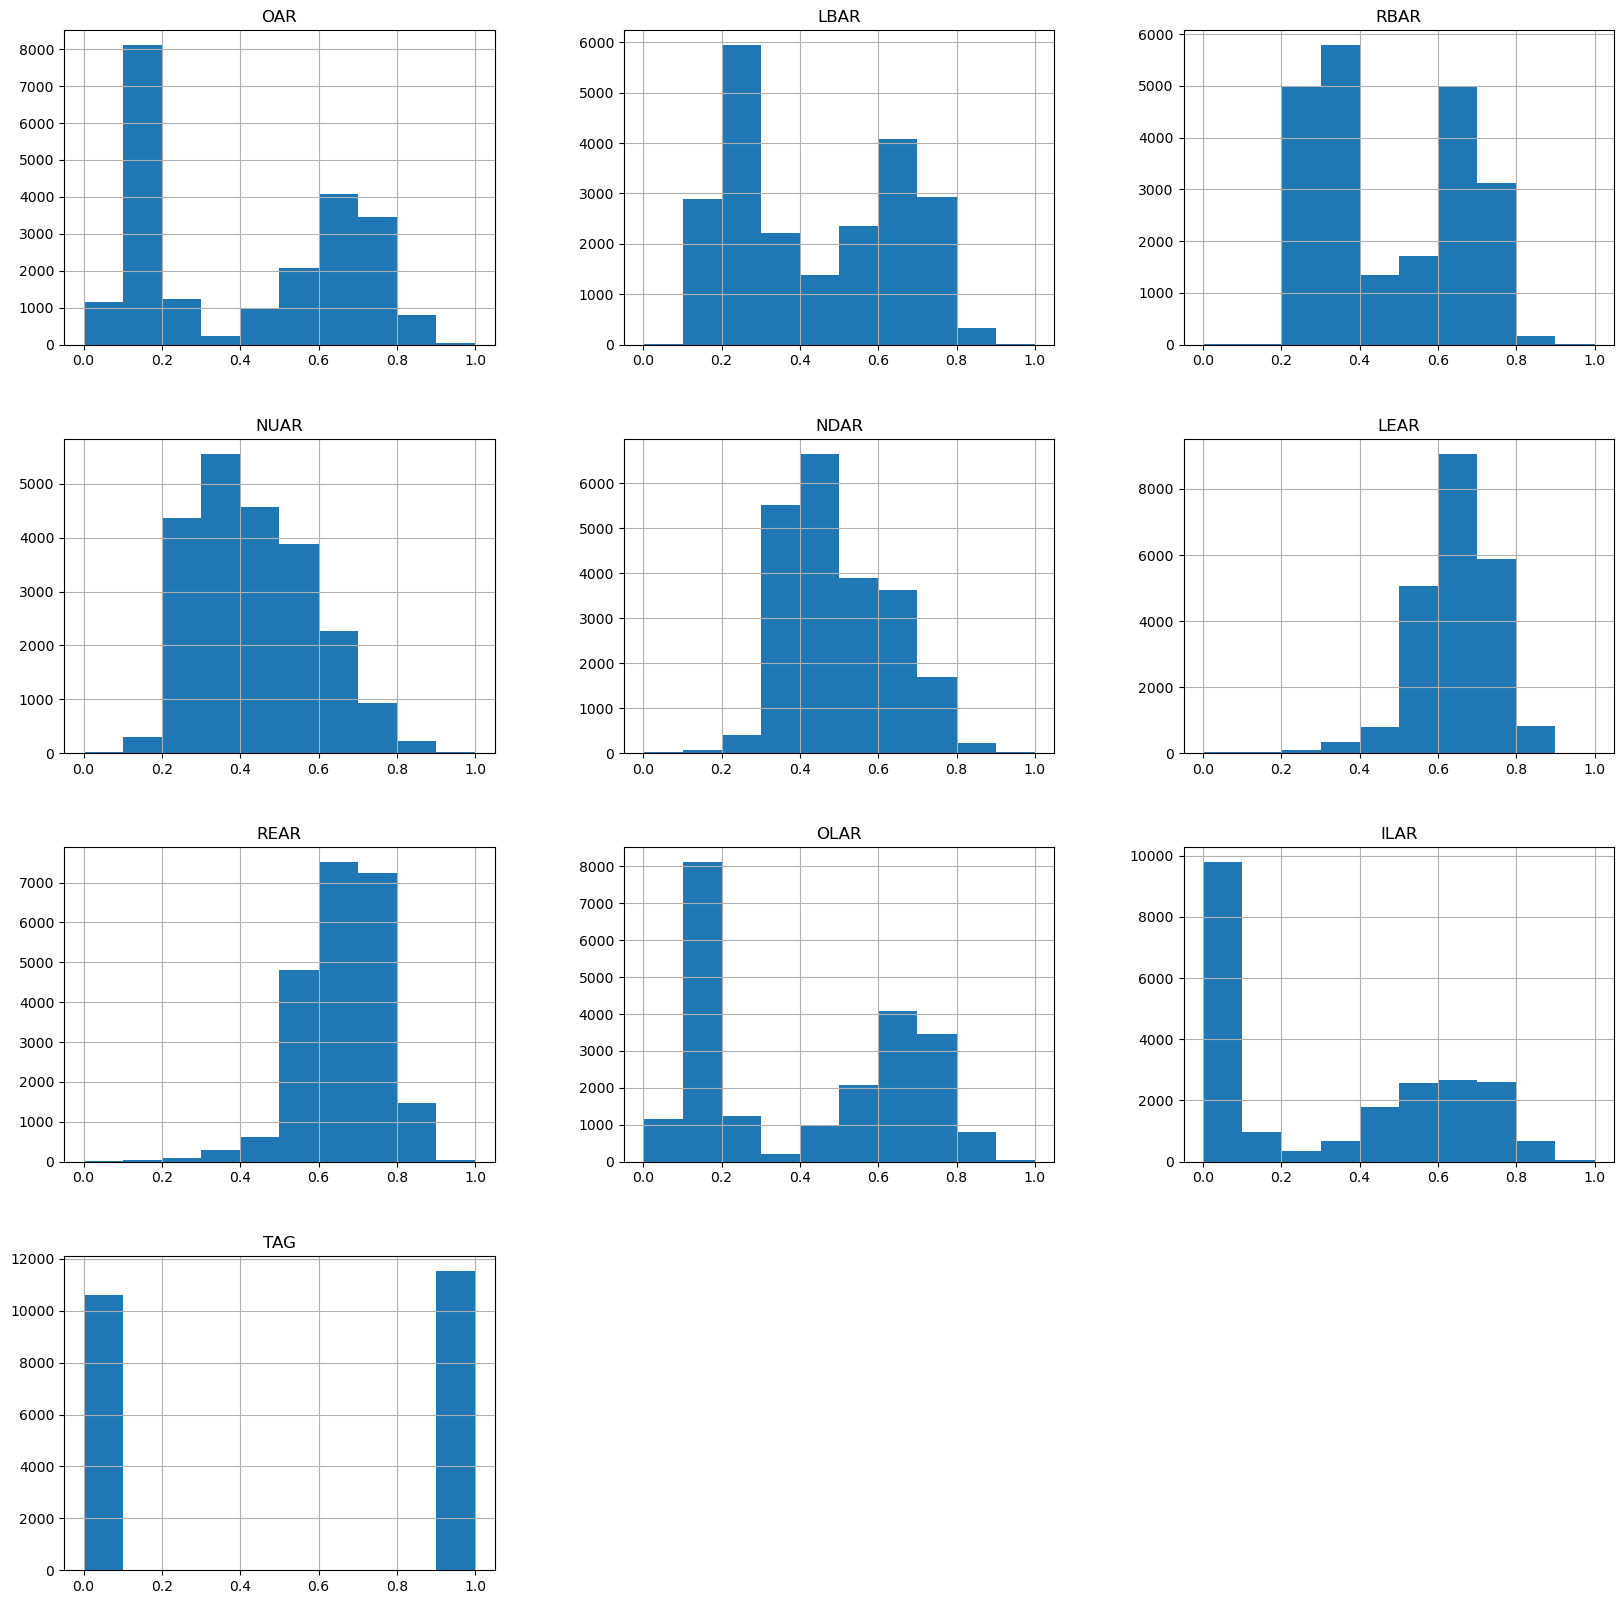

In [66]:
#EDA
df_norm = (df - df.min())/(df.max() - df.min())
print(df_norm.head(5),sep='\n')
hist = df_norm.hist(figsize=(20,20))

<Axes: >

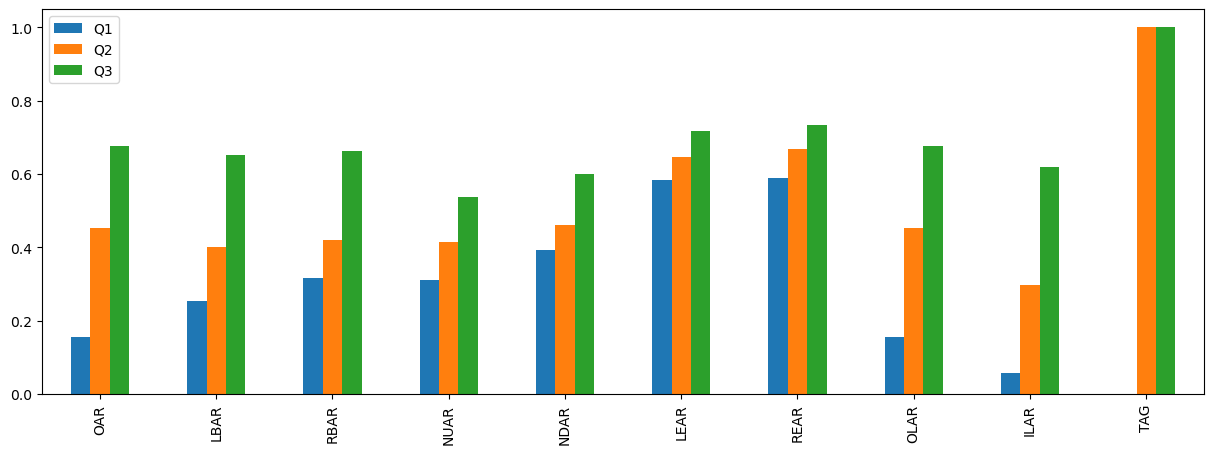

In [67]:
quartiles = df_norm.quantile([0.25,0.5,0.75])
quartiles = quartiles.T
quartiles = quartiles.rename(columns={0.25:'Q1',0.5:'Q2',0.75:'Q3'})
quartiles.plot(kind='bar',figsize=(15,5))


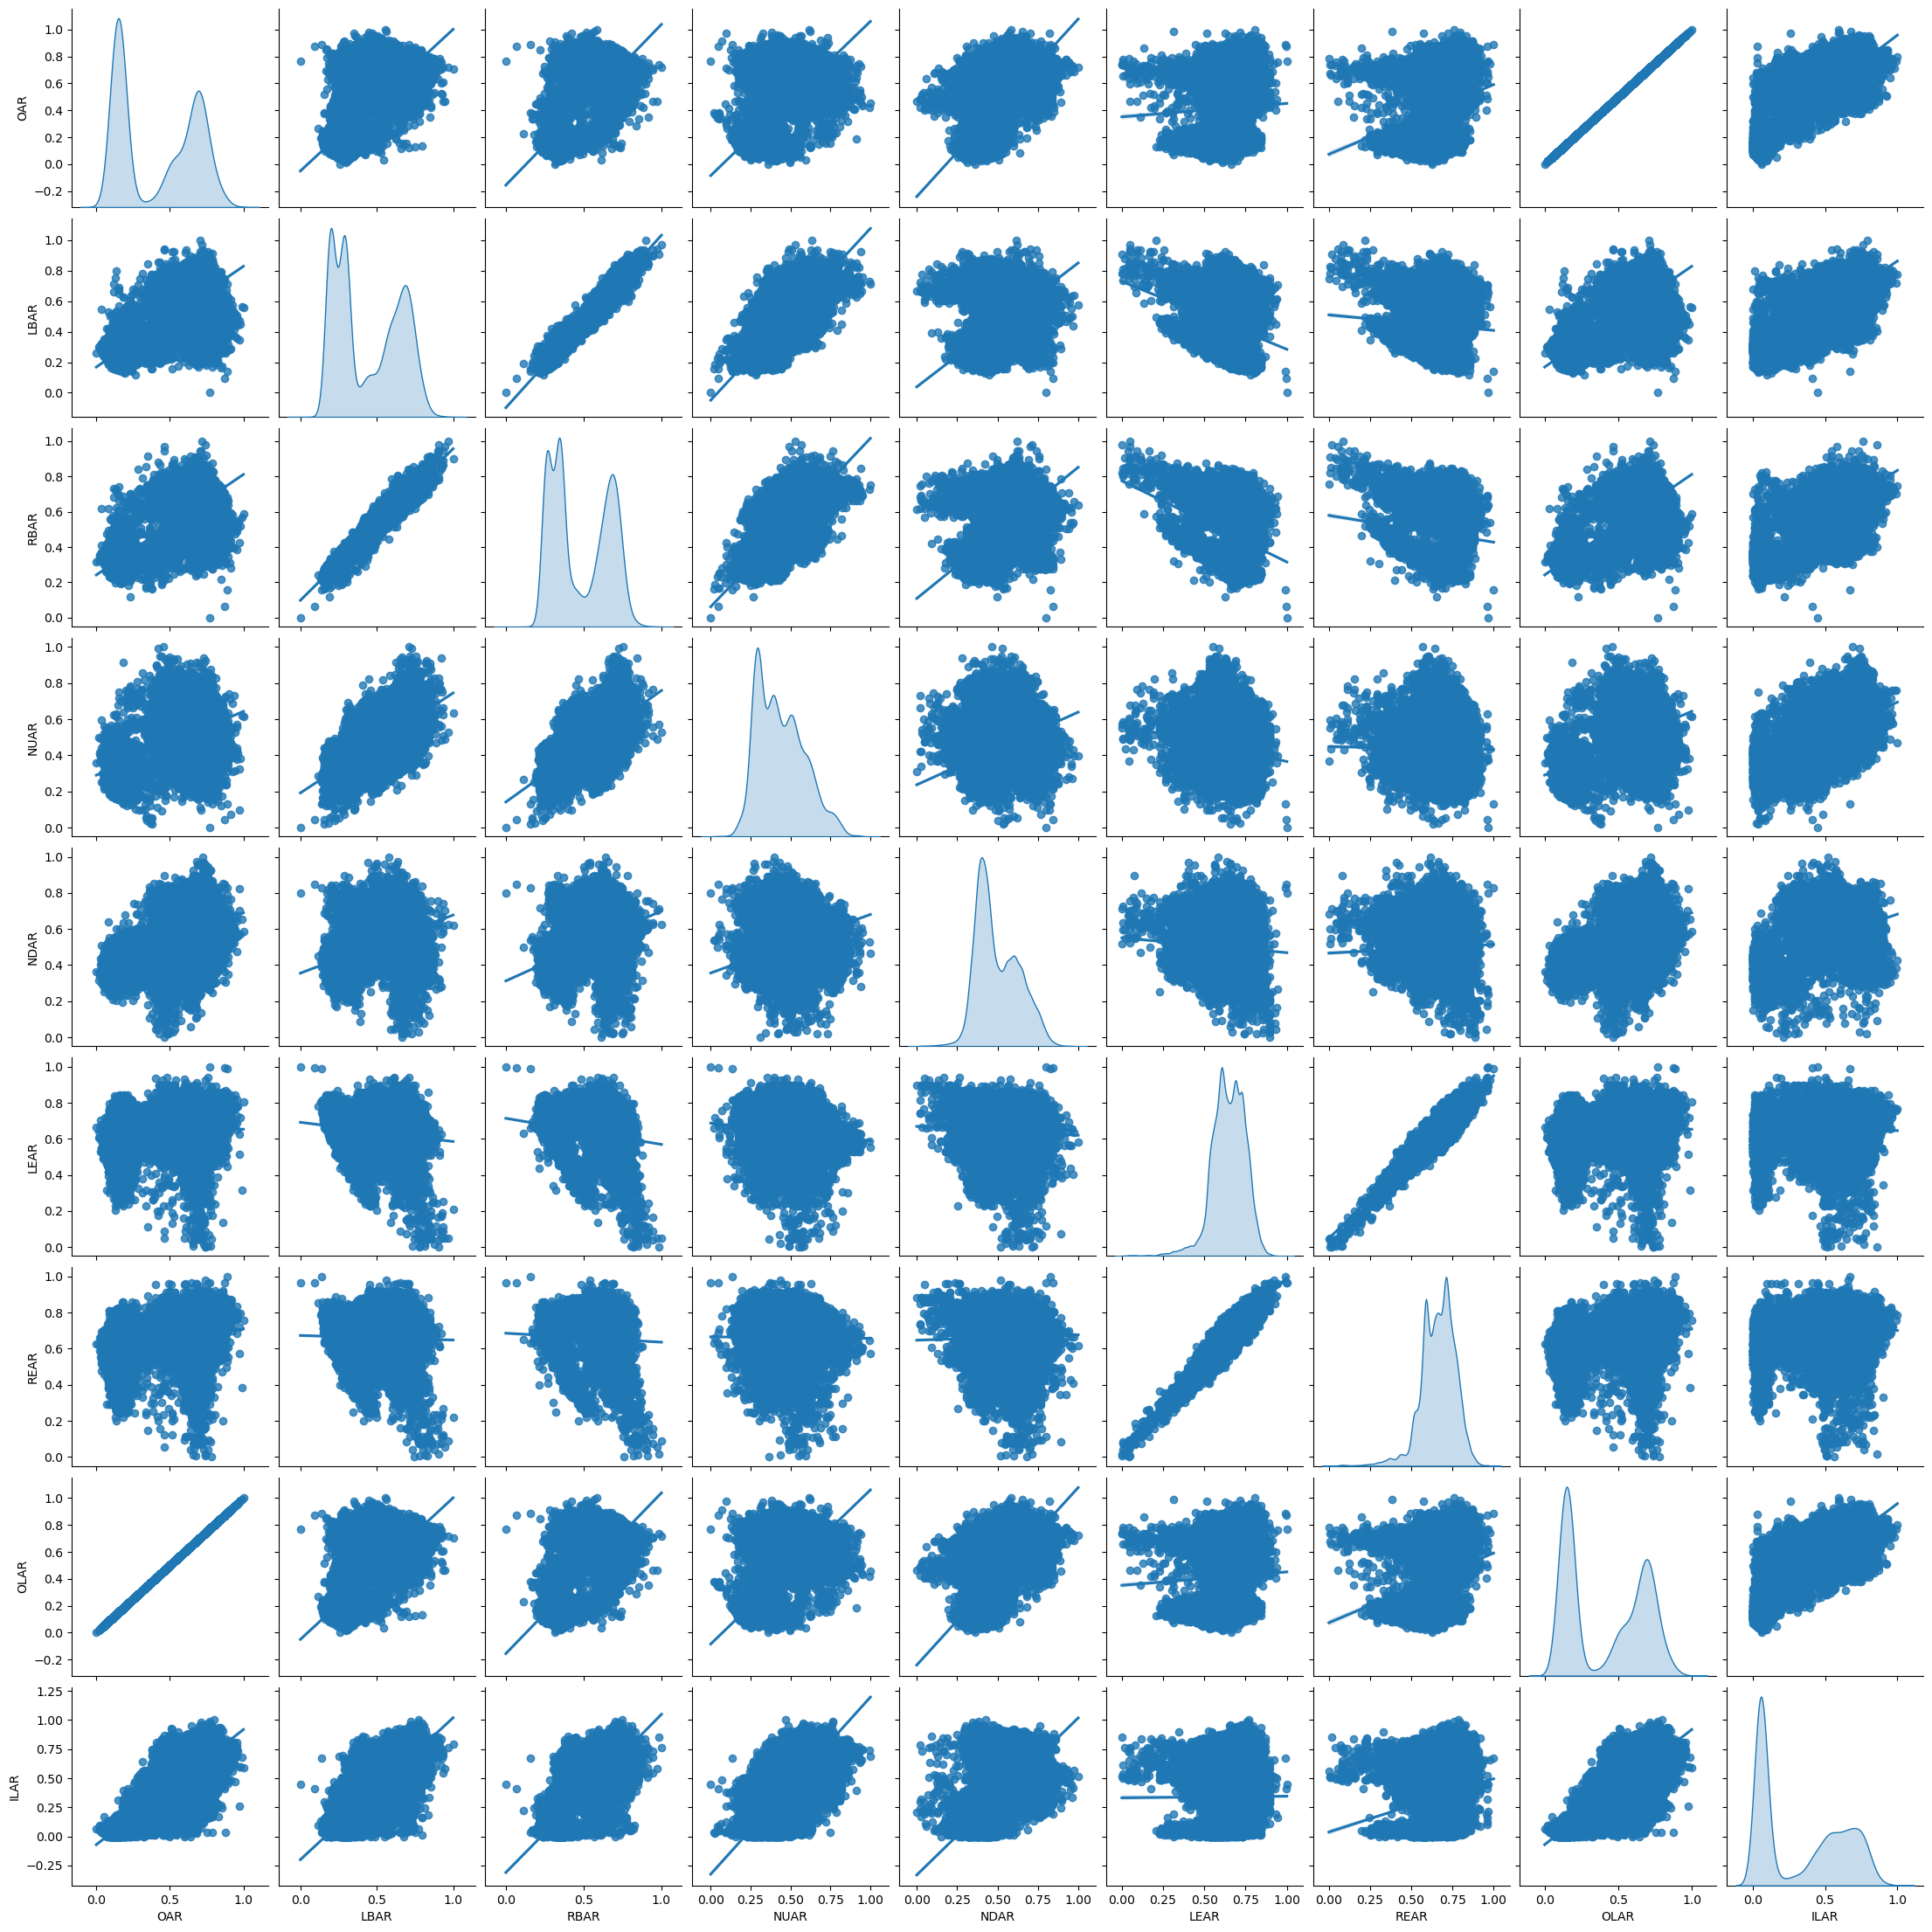

In [68]:
scatter = sb.pairplot(df_norm.iloc[:, :-1], kind='reg', diag_kind='kde', height=2.5)

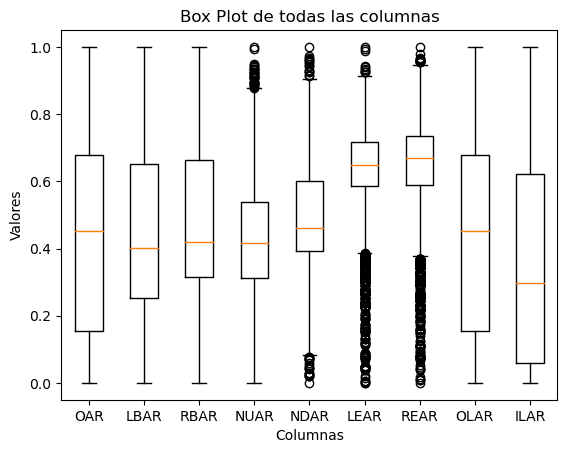

In [69]:
plt.boxplot(df_norm.iloc[:, :-1])
plt.xticks(range(1, len(df_norm.columns)), df_norm.columns[:-1])
plt.title('Box Plot de todas las columnas')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.show()

<Axes: >

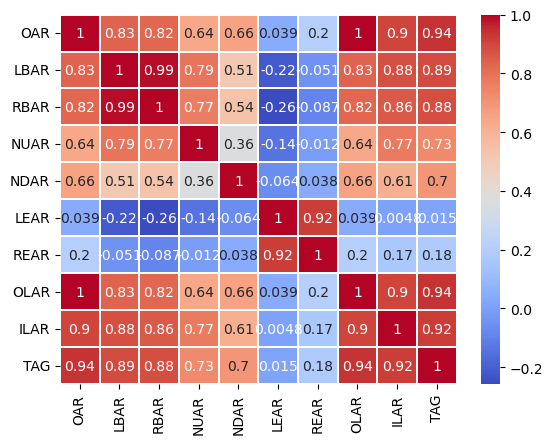

In [70]:
df_corr = df_norm.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.2)

In [77]:
df_discret = df_norm.copy()    
#Discretización de los feautures en 10 bins en un rango de 0 a 1
for i in df_discret.columns[:-1]:
    df_discret[i] = (pd.cut(df_discret[i], bins=10, labels=False, include_lowest=True))/10
print(df_norm.head(5),'\n',df_discret.head(5),sep='\n')


        OAR      LBAR      RBAR      NUAR      NDAR      LEAR      REAR  \
0  0.166667  0.301520  0.345122  0.382509  0.416935  0.529844  0.588074   
1  0.119565  0.292230  0.322548  0.365754  0.415470  0.603352  0.608042   
2  0.706522  0.835586  0.739403  0.706171  0.343686  0.585416  0.660558   
3  0.724638  0.671171  0.609481  0.572742  0.451216  0.635695  0.698031   
4  0.061594  0.280968  0.334337  0.400695  0.391444  0.626286  0.589442   

       OLAR      ILAR  TAG  
0  0.166667  0.045090  0.0  
1  0.119565  0.033384  0.0  
2  0.706522  0.694559  1.0  
3  0.724638  0.661825  1.0  
4  0.061594  0.047258  0.0  


   OAR  LBAR  RBAR  NUAR  NDAR  LEAR  REAR  OLAR  ILAR  TAG
0  0.1   0.3   0.3   0.3   0.4   0.5   0.5   0.1   0.0  0.0
1  0.1   0.2   0.3   0.3   0.4   0.6   0.6   0.1   0.0  0.0
2  0.7   0.8   0.7   0.7   0.3   0.5   0.6   0.7   0.6  1.0
3  0.7   0.6   0.6   0.5   0.4   0.6   0.6   0.7   0.6  1.0
4  0.0   0.2   0.3   0.4   0.3   0.6   0.5   0.0   0.0  0.0


In [105]:
df_discret.nunique()

OAR     10
LBAR    10
RBAR    10
NUAR    10
NDAR    10
LEAR    10
REAR    10
OLAR    10
ILAR    10
TAG      2
dtype: int64

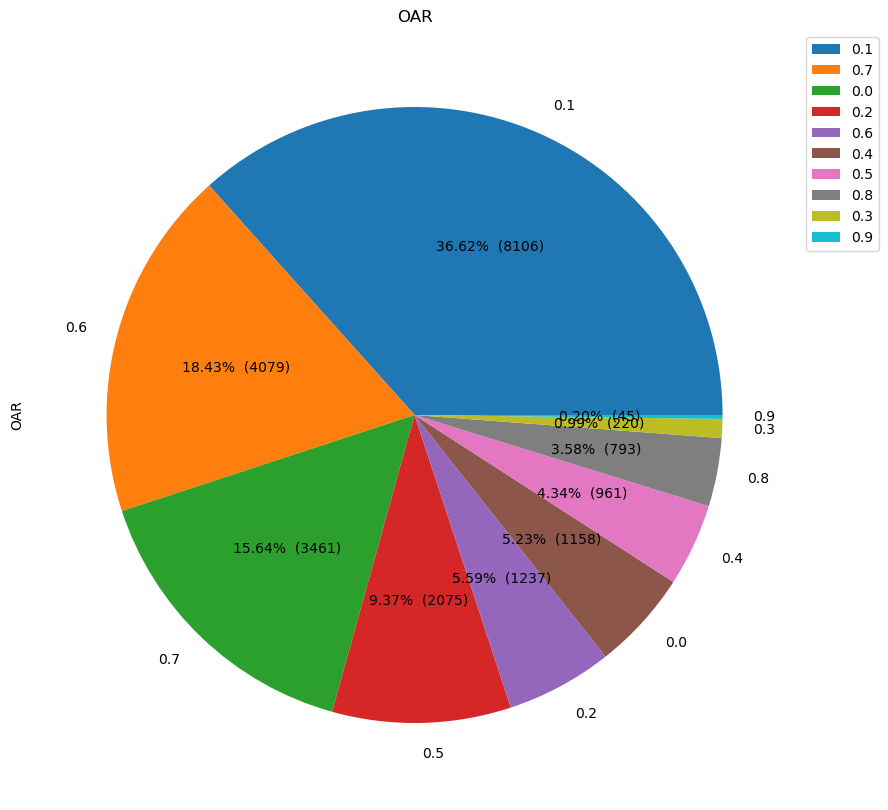

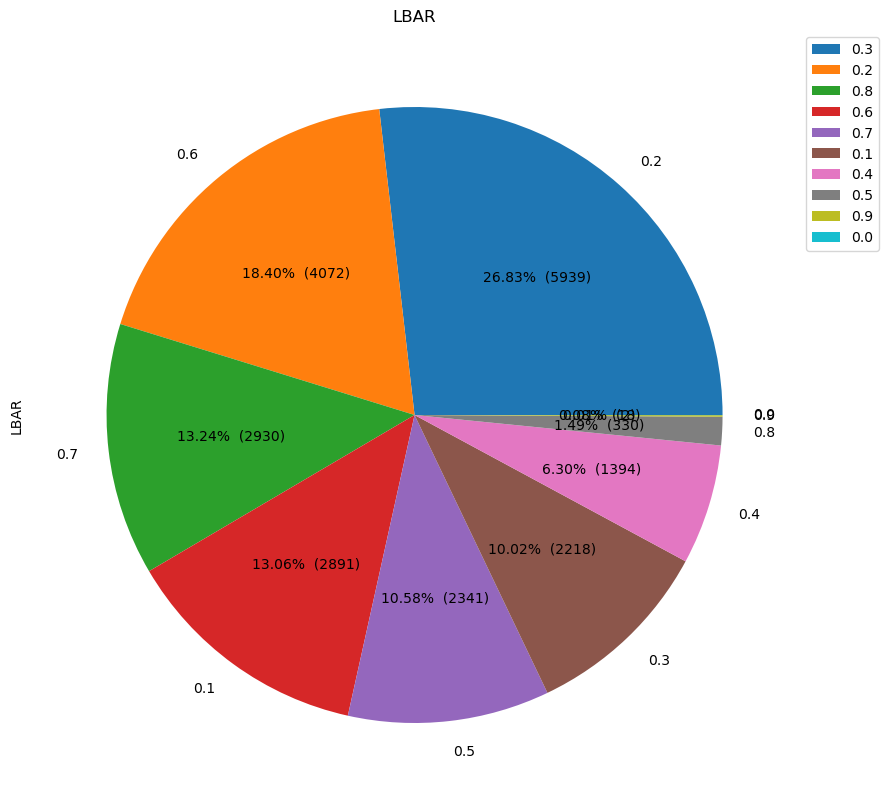

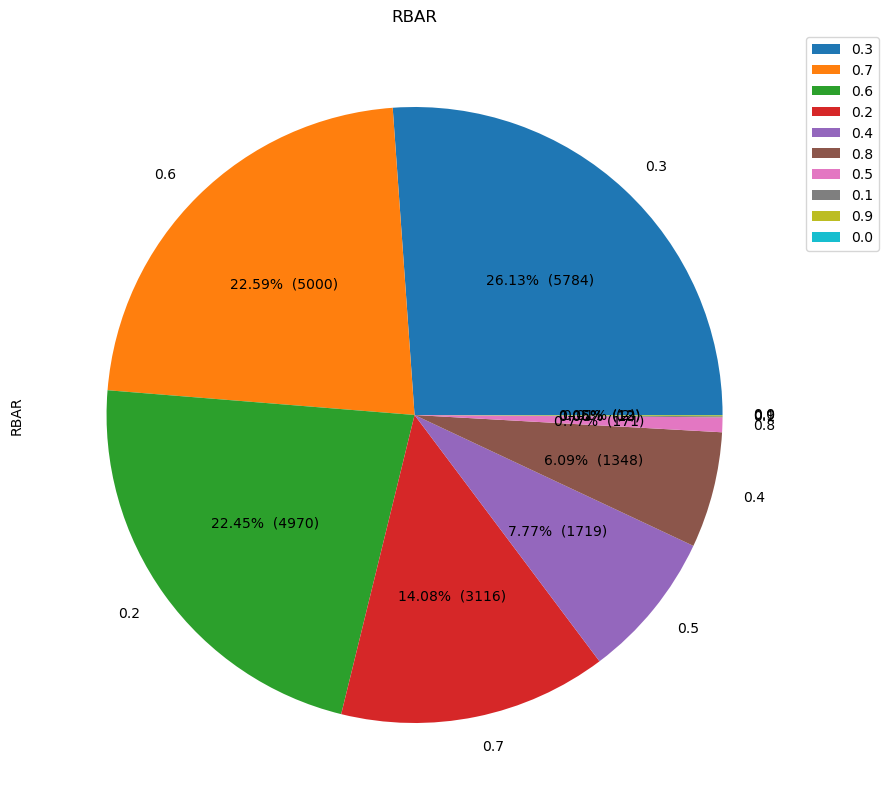

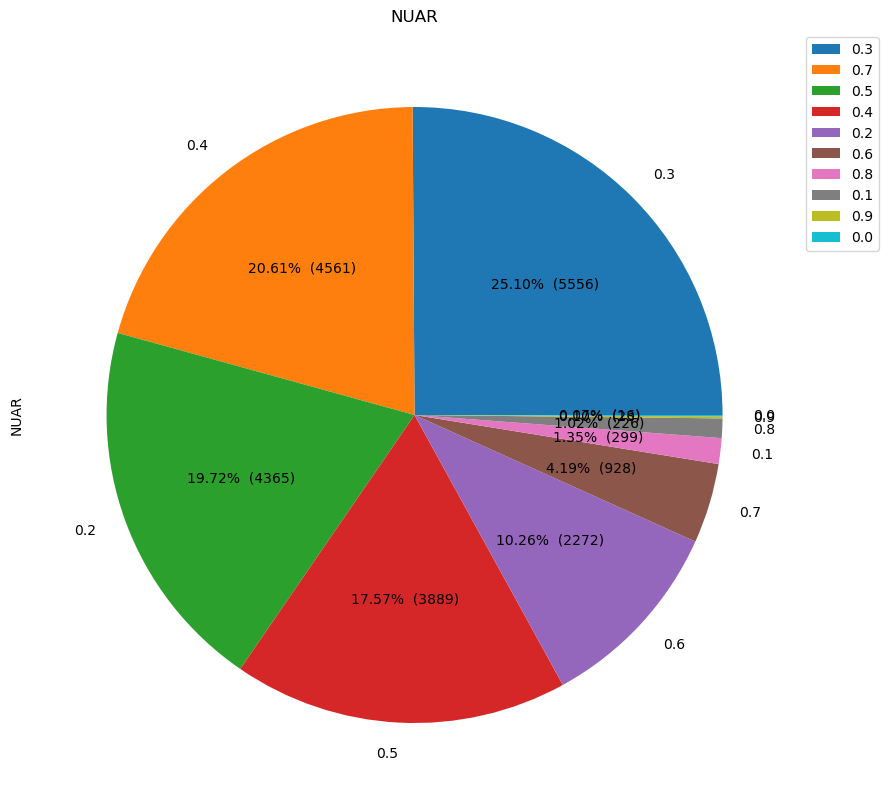

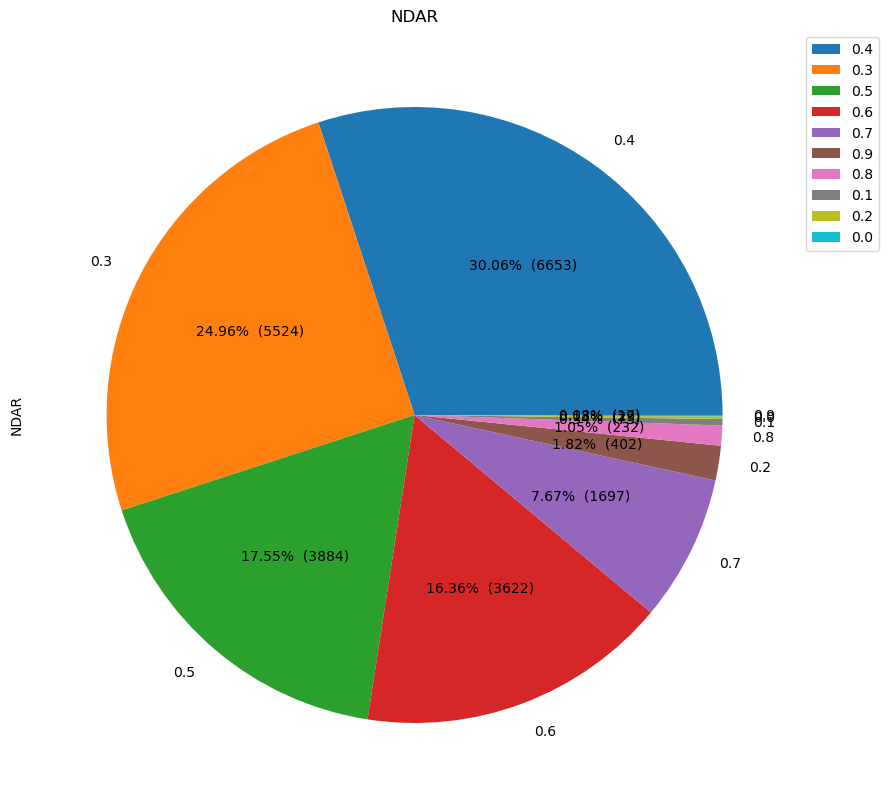

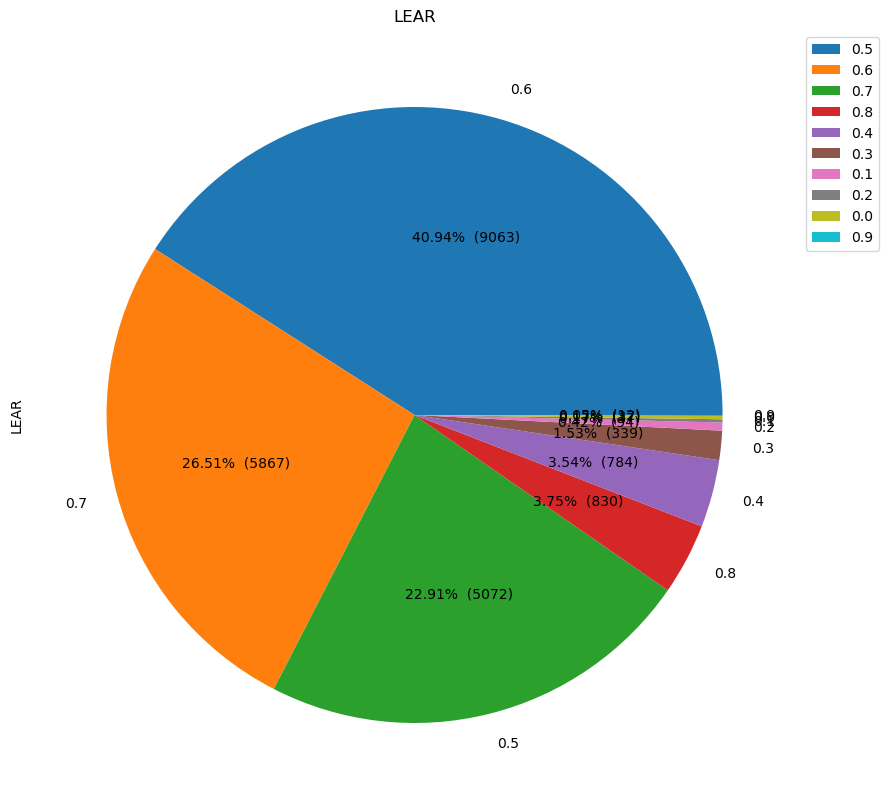

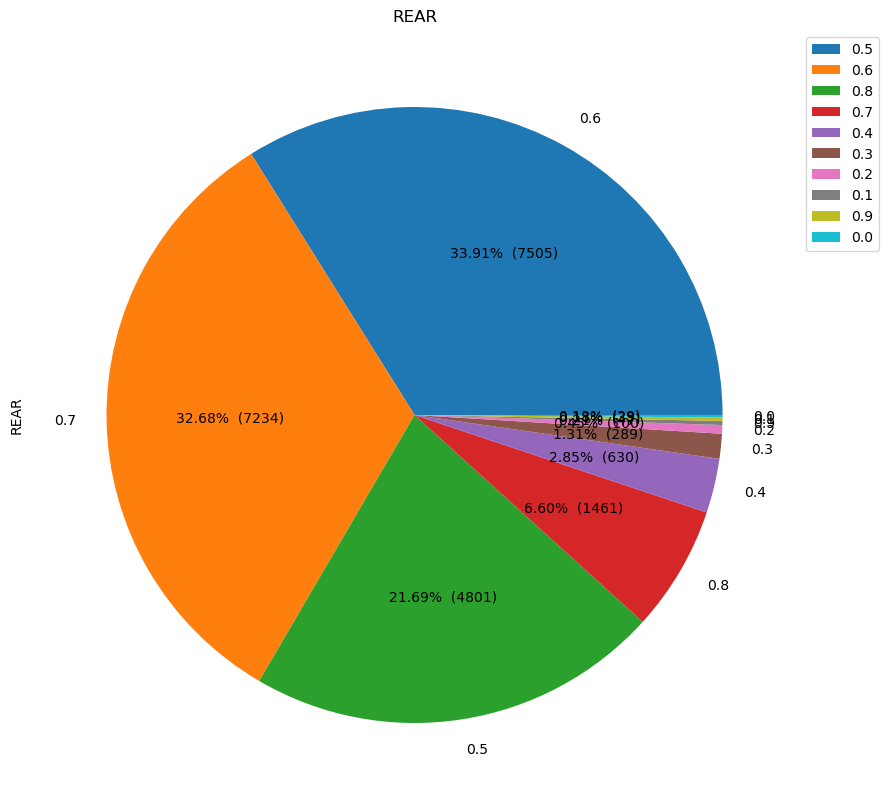

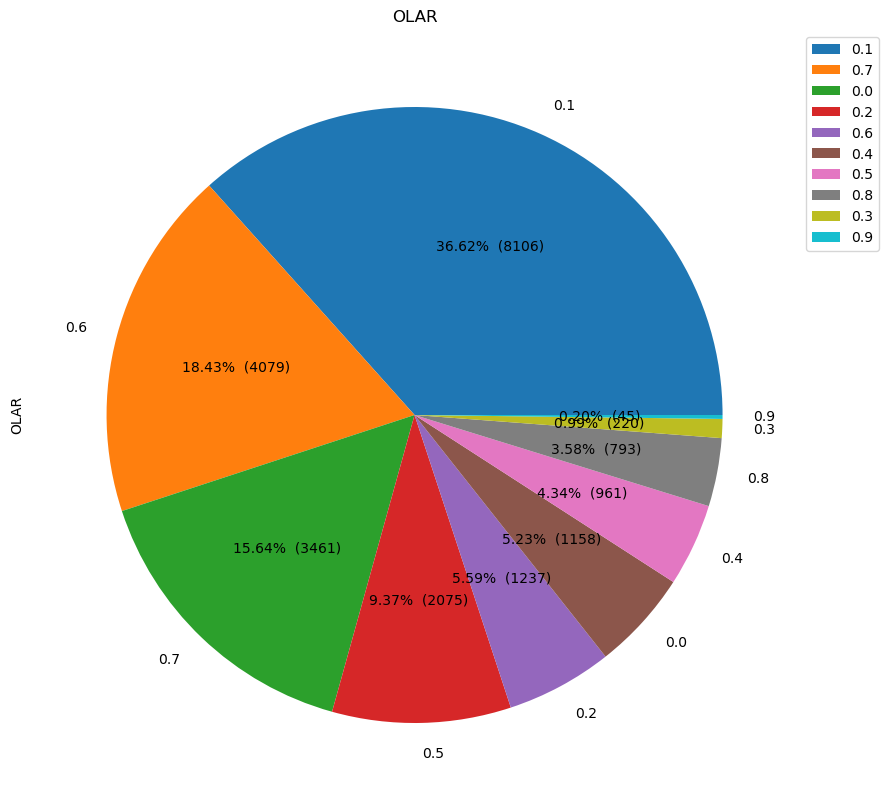

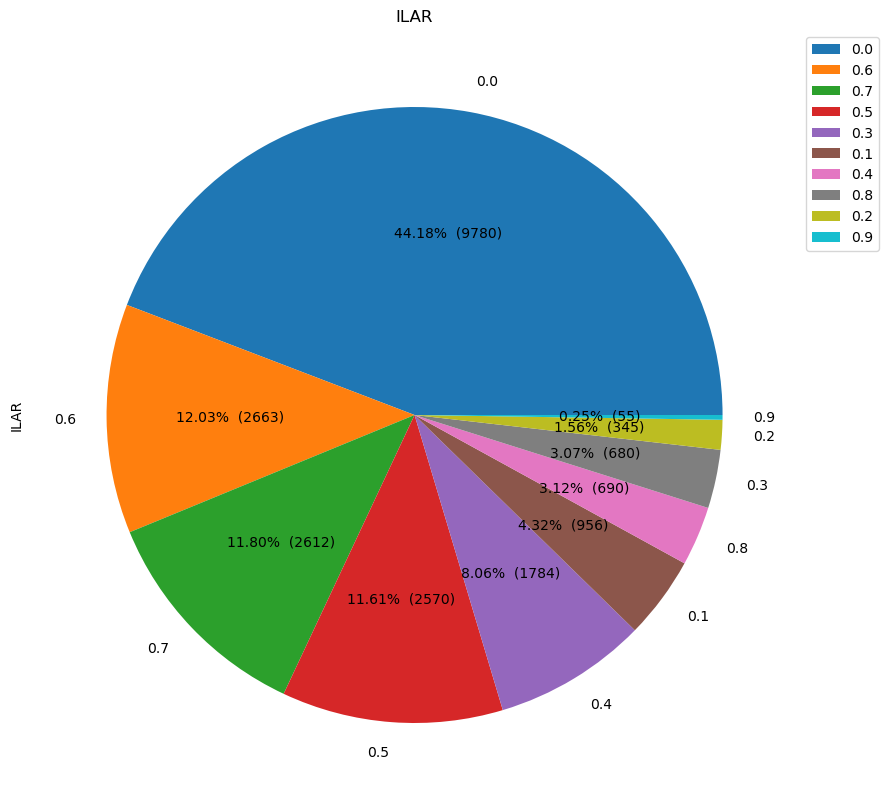

In [125]:
for i in df_discret.columns:
    if i == 'TAG':
        break
    
    def my_autopct(pct):
        total = sum(df_discret[i].value_counts())
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        #'%1.2f%%'
    
    df_discret[i].value_counts().plot(kind='pie',figsize=(15,10),autopct=lambda pct: my_autopct(pct)).legend(labels=df_discret[i].unique(), loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(i)
    plt.show()

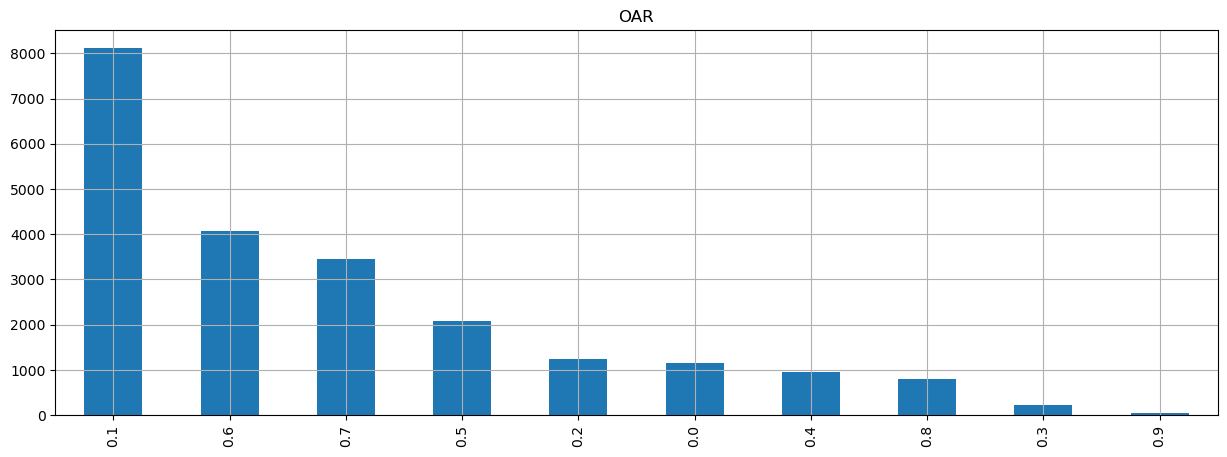

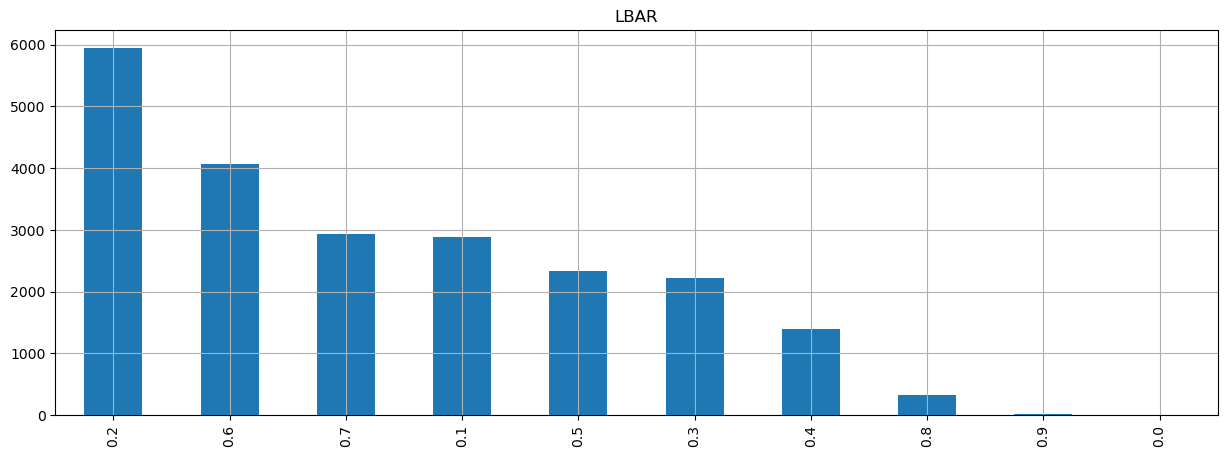

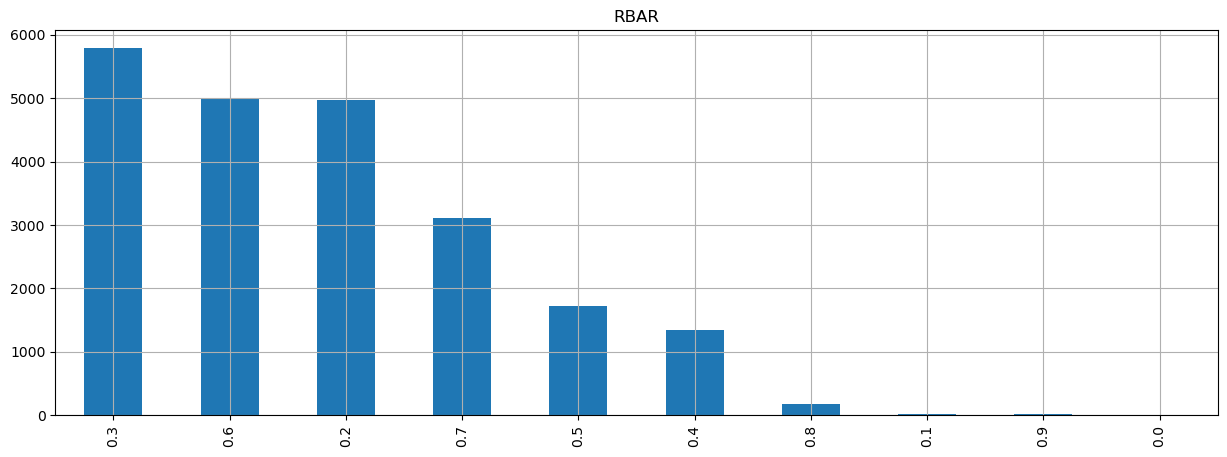

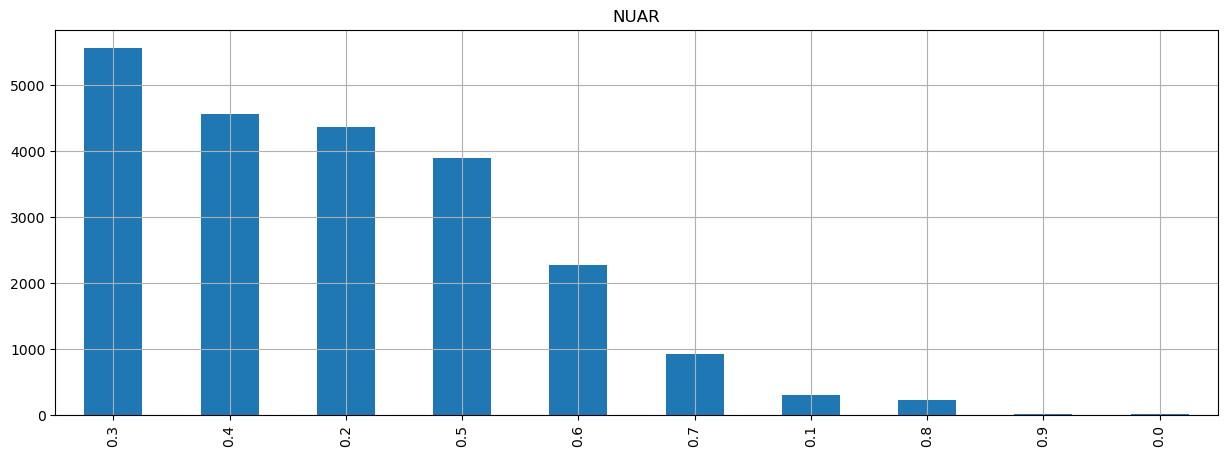

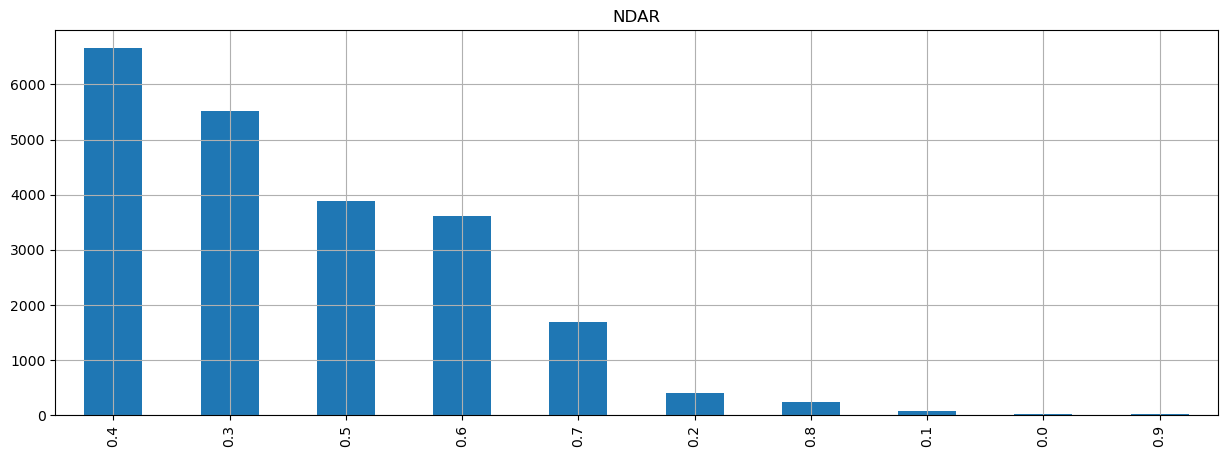

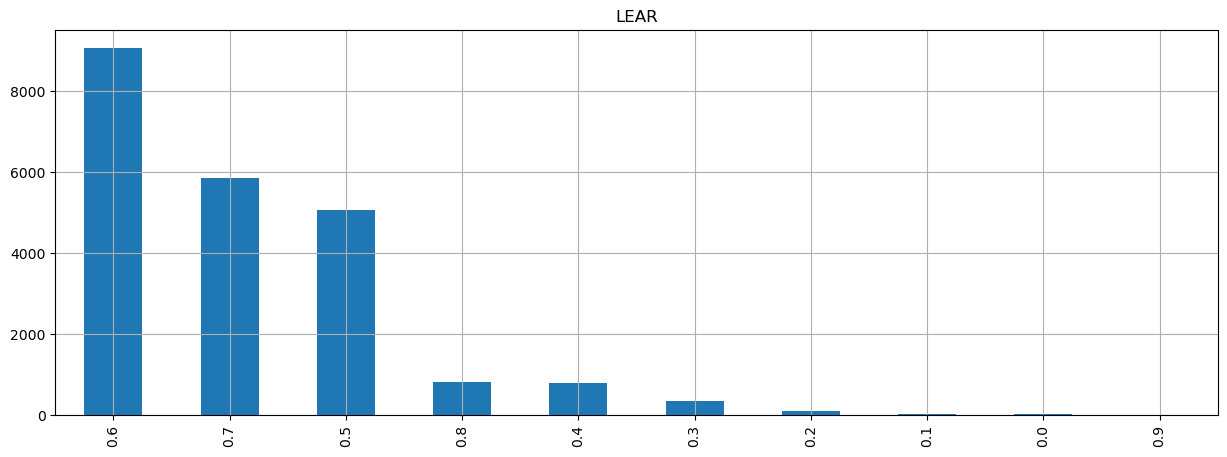

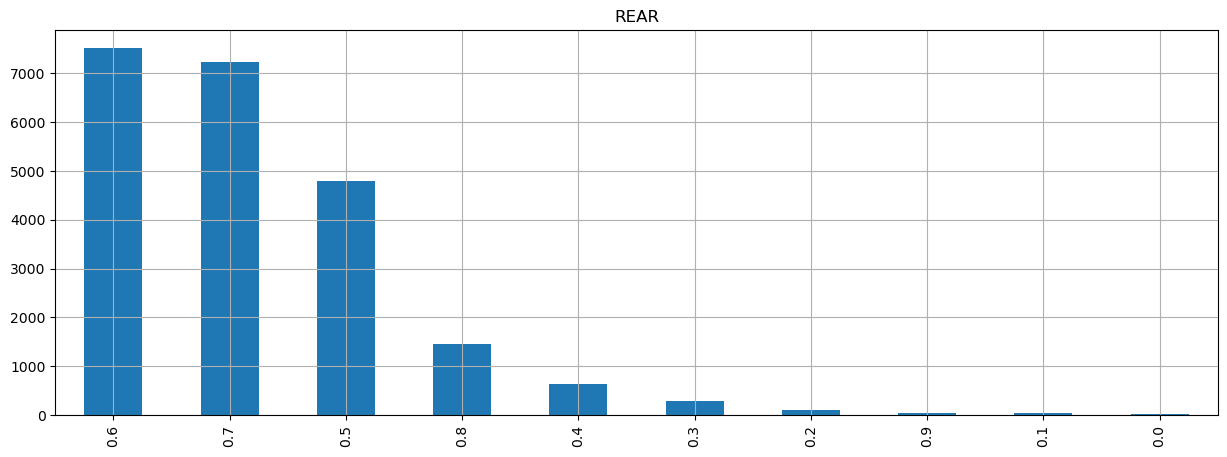

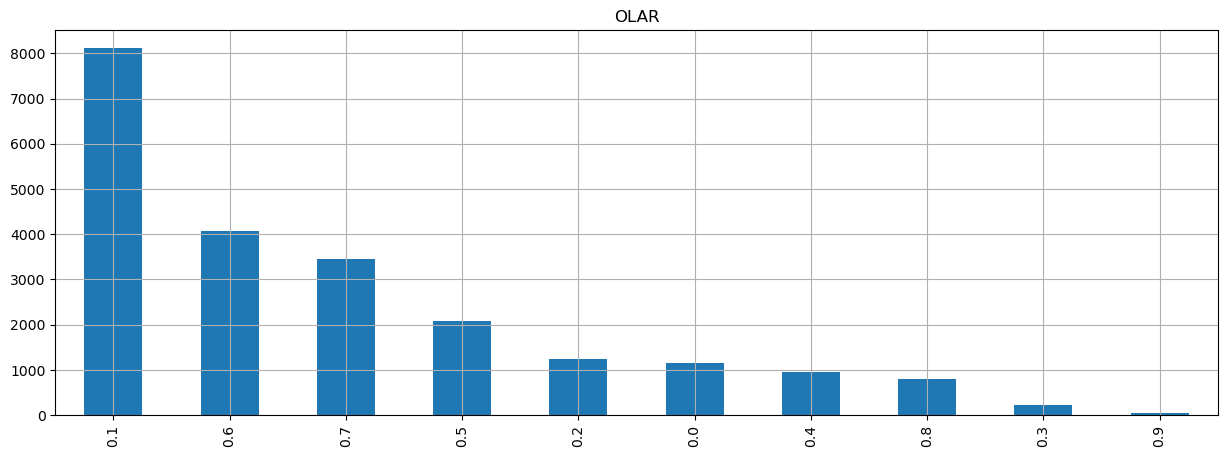

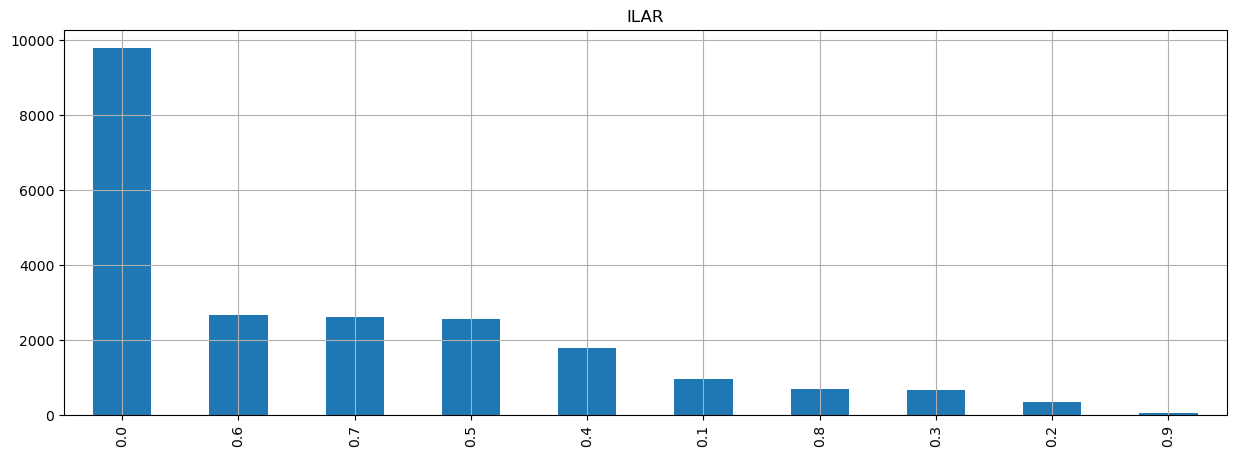

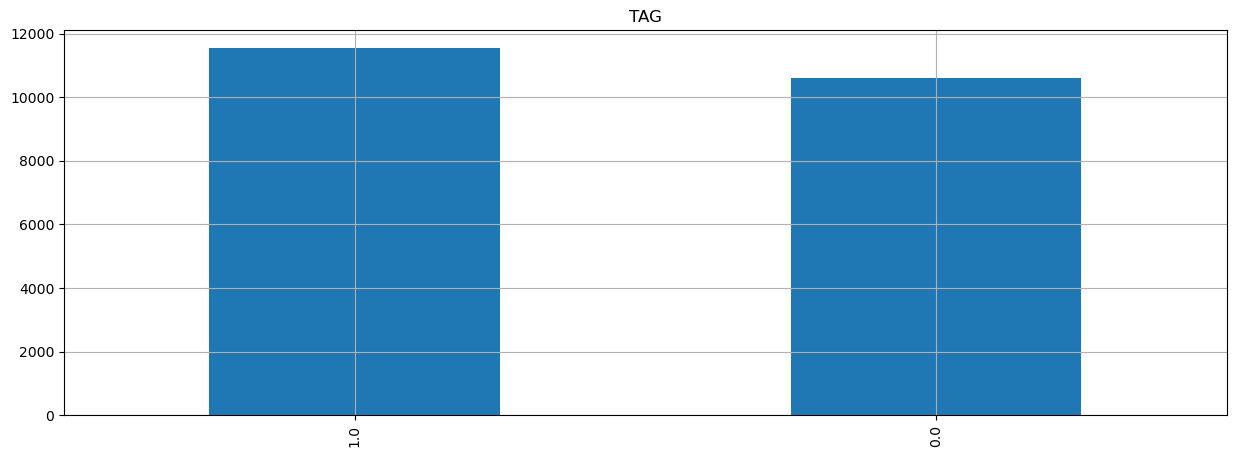

In [126]:
for i in df_discret.columns:
    df_discret[i].value_counts().plot(kind='bar',figsize=(15,5))
    plt.title(i)
    plt.grid()
    plt.show()

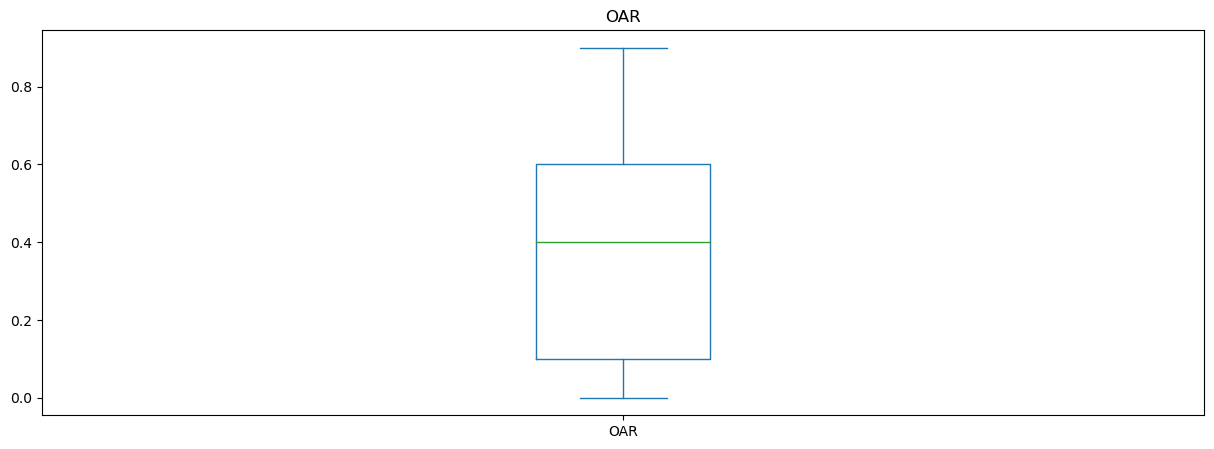

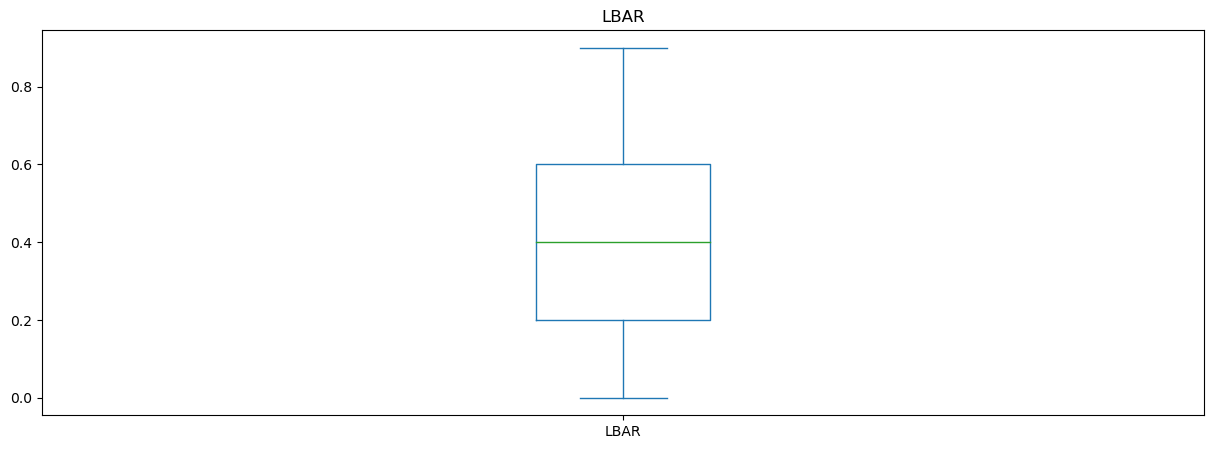

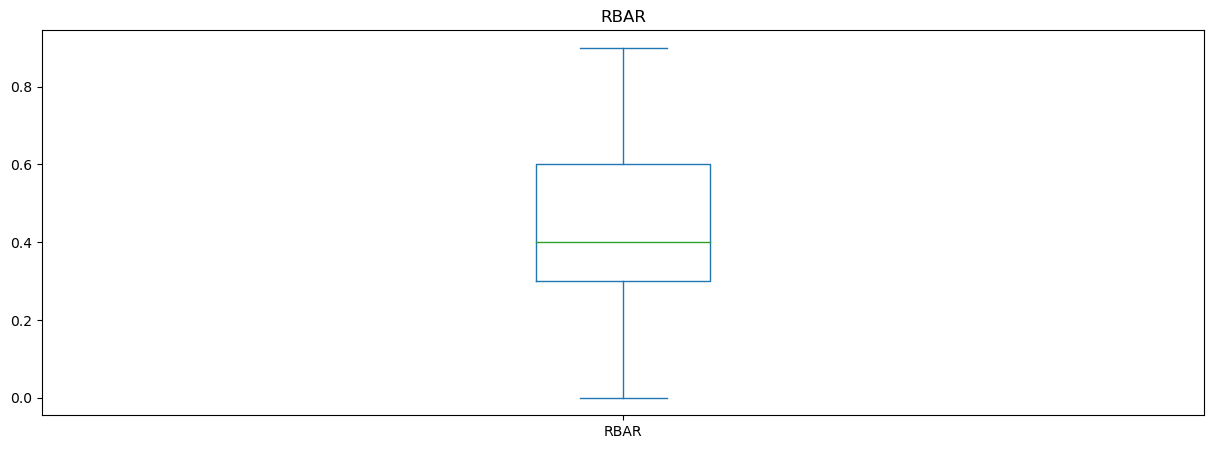

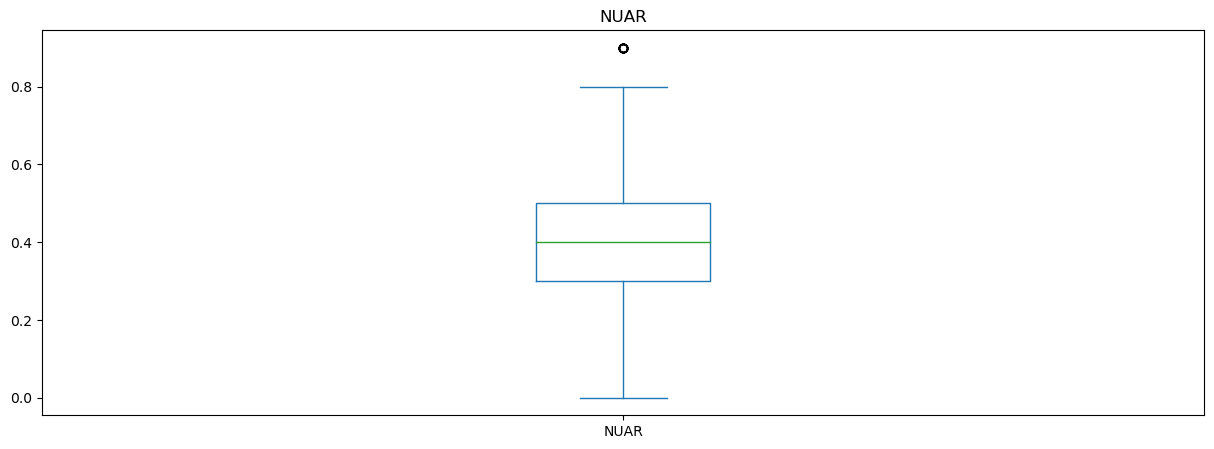

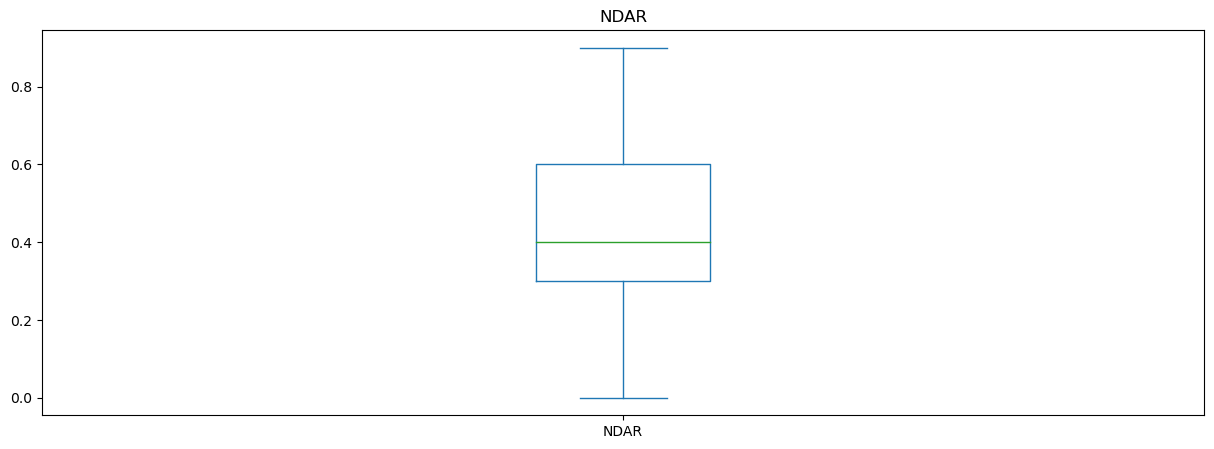

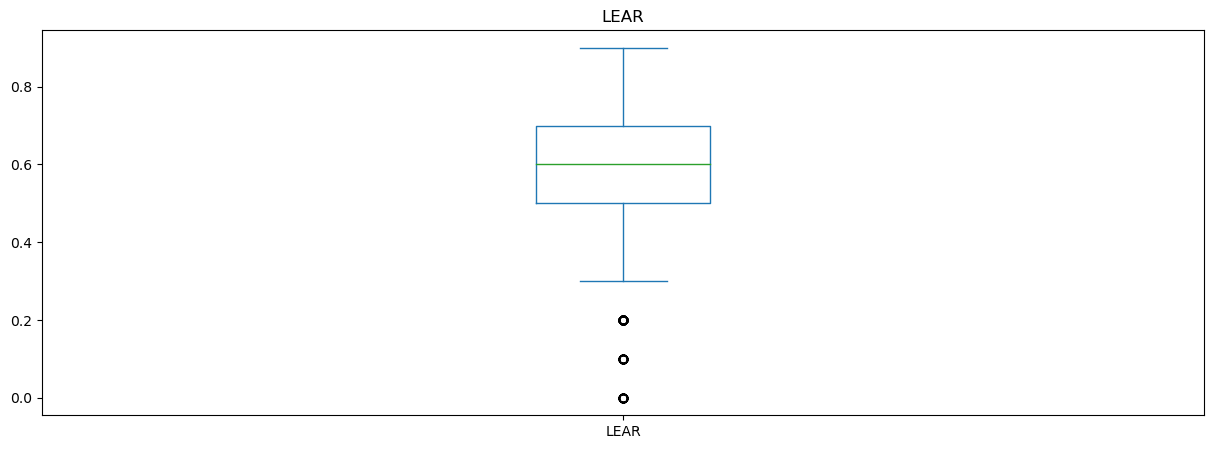

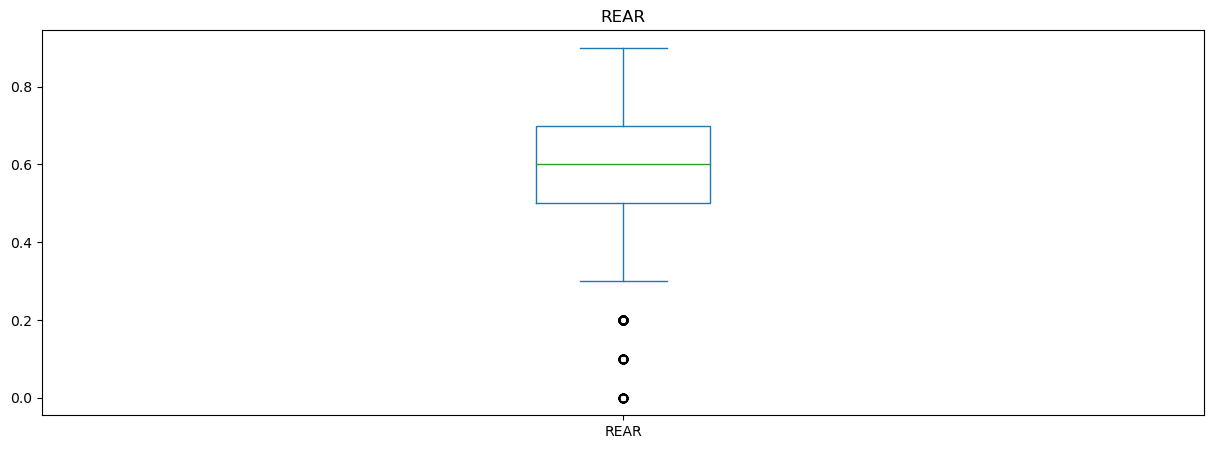

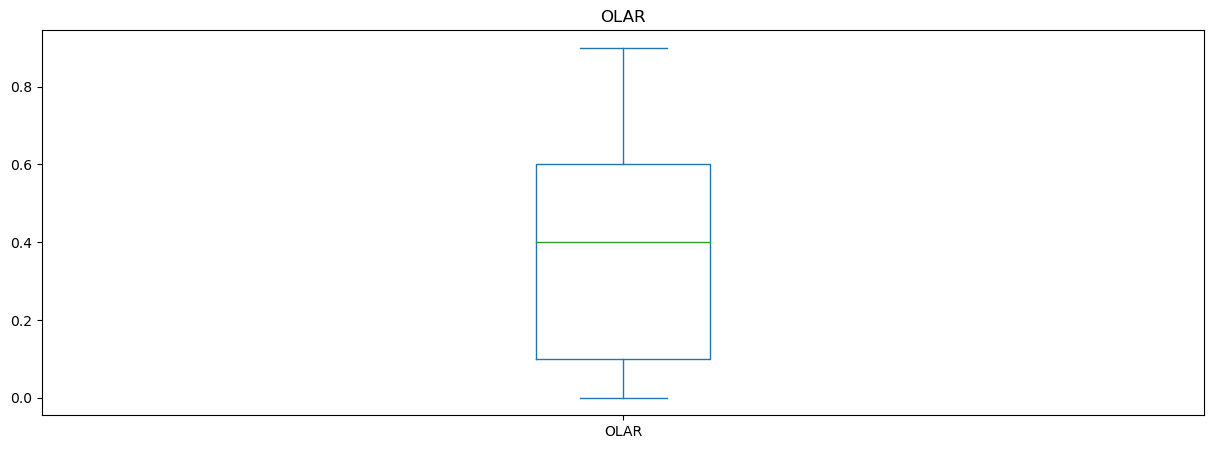

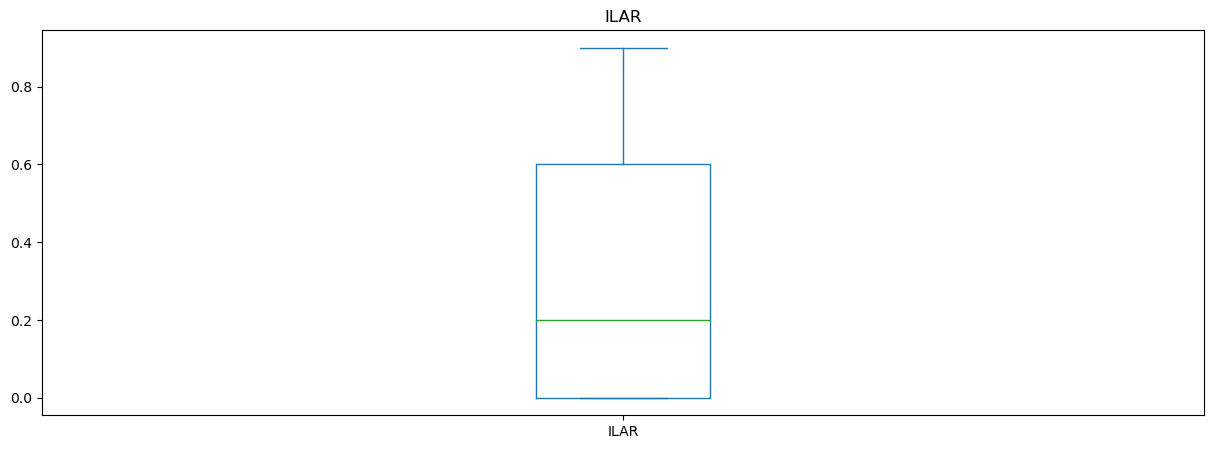

In [124]:
for i in df_discret.columns:
    if i == 'TAG':
        break
    df_discret[i].plot(kind='box',figsize=(15,5))
    plt.title(i)
    plt.show()

<Axes: >

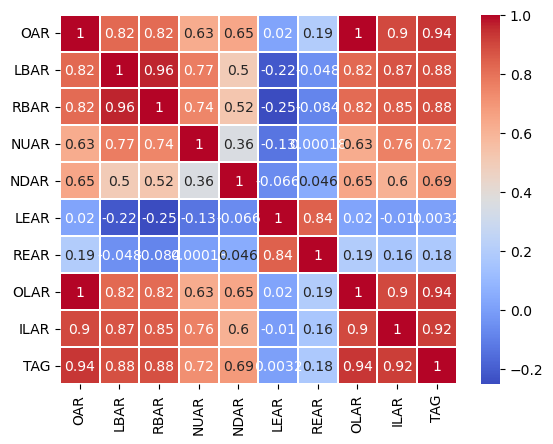

In [78]:
df_new_corr = df_discret.corr()
sns.heatmap(df_new_corr, annot=True, cmap='coolwarm', linewidths=0.2)

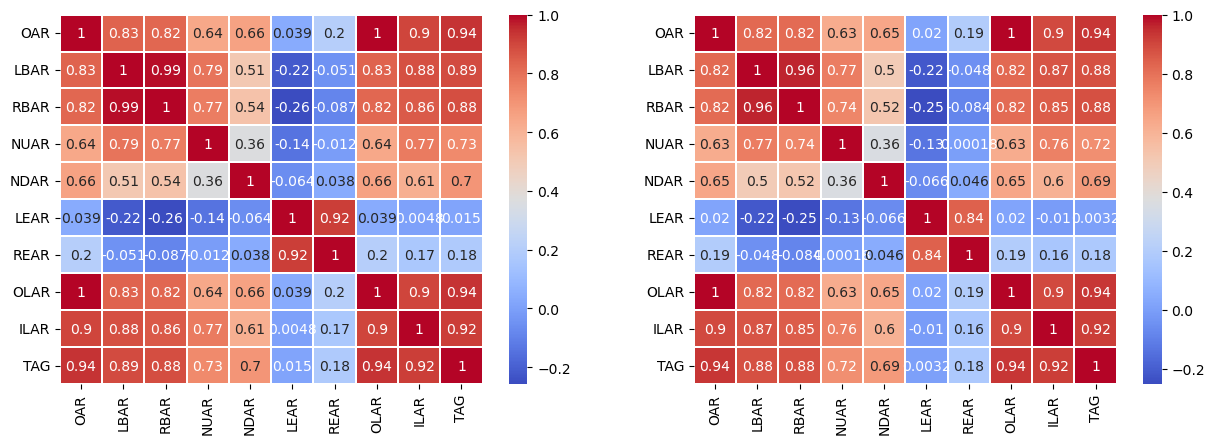

In [91]:
#plot dos heatmap usando sns en la misma imagen
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(df_corr, ax=ax1, annot=True, cmap='coolwarm', linewidths=0.2)
sns.heatmap(df_new_corr, ax=ax2, annot=True, cmap='coolwarm', linewidths=0.2)
fig.set_figwidth(15)
plt.show()

   OAR  LBAR  RBAR  NUAR  NDAR  OLAR  ILAR  TAG
0  0.1   0.3   0.3   0.3   0.4   0.1   0.0  0.0
1  0.1   0.2   0.3   0.3   0.4   0.1   0.0  0.0
2  0.7   0.8   0.7   0.7   0.3   0.7   0.6  1.0
3  0.7   0.6   0.6   0.5   0.4   0.7   0.6  1.0
4  0.0   0.2   0.3   0.4   0.3   0.0   0.0  0.0


<Axes: >

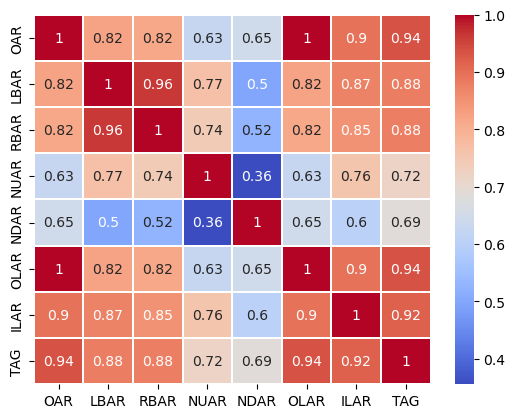

In [99]:
#Drop de las columnas que no aportan información
df_drop = df_discret.drop(['LEAR','REAR'], axis=1)
print(df_drop.head(5))
df_drop_corr = df_drop.corr()
sns.heatmap(df_drop_corr, annot=True, cmap='coolwarm', linewidths=0.2)

REGRESIÓN LOGISTICA

In [150]:
main_df = df_drop.copy()
X = main_df.iloc[:,  :-1].values
y = main_df.iloc[:, -1].values
X

array([[0.1, 0.3, 0.3, 0.3, 0.4, 0.1, 0. ],
       [0.1, 0.2, 0.3, 0.3, 0.4, 0.1, 0. ],
       [0.7, 0.8, 0.7, 0.7, 0.3, 0.7, 0.6],
       [0.7, 0.6, 0.6, 0.5, 0.4, 0.7, 0.6],
       [0. , 0.2, 0.3, 0.4, 0.3, 0. , 0. ],
       [0.2, 0.3, 0.3, 0.3, 0.3, 0.2, 0. ],
       [0.6, 0.7, 0.7, 0.5, 0.5, 0.6, 0.6],
       [0.1, 0.2, 0.2, 0.4, 0.4, 0.1, 0. ],
       [0.1, 0.2, 0.3, 0.2, 0.3, 0.1, 0. ],
       [0.1, 0.1, 0.2, 0.3, 0.3, 0.1, 0. ],
       [0.7, 0.6, 0.7, 0.6, 0.6, 0.7, 0.7],
       [0.4, 0.6, 0.6, 0.8, 0.6, 0.4, 0.5],
       [0.1, 0.2, 0.2, 0.3, 0.4, 0.1, 0. ],
       [0.4, 0.4, 0.4, 0.4, 0.7, 0.4, 0.5],
       [0.6, 0.5, 0.6, 0.3, 0.5, 0.6, 0.3],
       [0.1, 0.2, 0.3, 0.4, 0.4, 0.1, 0. ],
       [0. , 0.3, 0.3, 0.3, 0.3, 0. , 0.1],
       [0.6, 0.5, 0.6, 0.5, 0.7, 0.6, 0.4],
       [0.2, 0.3, 0.3, 0.2, 0.4, 0.2, 0. ],
       [0. , 0.2, 0.3, 0.3, 0.3, 0. , 0. ],
       [0.6, 0.6, 0.6, 0.5, 0.4, 0.6, 0.6],
       [0.5, 0.5, 0.6, 0.4, 0.6, 0.5, 0.4],
       [0.8, 0.4, 0.4, 0.5, 0.5,

In [151]:
Labelencoder_y = LabelEncoder()
y = Labelencoder_y.fit_transform(y)
y

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1010)

In [153]:
logreg = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=400)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=400, random_state=0)

In [155]:
y_predLR = logreg.predict(X_test)
#print(np.concatenate((y_predLR.reshape(len(y_predLR),1), y_test.reshape(len(y_test),1)),1))
logreg.coef_

array([[5.32887435, 6.35592824, 6.4281826 , 2.88794736, 6.06725316,
        5.32887435, 7.01654352]])

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predLR))
accuracy_score(y_test, y_predLR)

[[2110    0]
 [   6 2311]]


0.9986446803704541

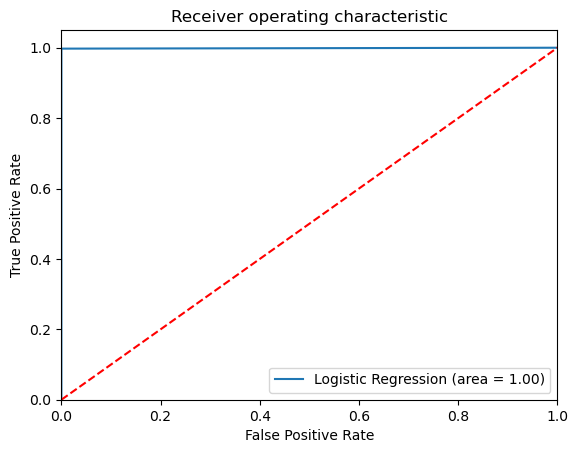

In [157]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,y_predLR)
fpr, tpr, thresholds = roc_curve(y_test,y_predLR)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [160]:
import pickle
filename = 'modelo_rl'
pickle.dump(logreg,open(filename,'wb'))